In [1]:
import pandas as pd 
import numpy as np 
import os 
import seaborn as sb
from matplotlib import pyplot as plt

#### This notebook is used to analyze sugarscape price equillibrium with different agent types

In [2]:
for file in os.listdir("parquet"): 
    if os.listdir("parquet/" + file) == []: 
        print(file)
    

optimizer
optimizer-arbitrageur


#### Replicate these variables from the GUI.py file. Could be called from this notebook but there would be too many print statements. Choose which variables to save in cols. 

In [3]:
model_attributes = ["population", "total_exchanges", "total_agents_created", "total_avg_price",
                    #"runtime",
                     #"water_avg_price", "sugar_avg_price",# "total_variance", "water_variance", "sugar_variance",
                       "real_income_per_capital", "wealth_per_capita", "savings", "income",
                      "num_basicherders", "num_arbitrageurherders", "num_basicbasics", "num_arbitrageurbasics"]#, 
                        #"basicbasic_res_demand", "basicherder_res_demand", "arbitrageurbasic_res_demand", "arbitrageurherder_res_demand", "optimizer_MRS", "num_optimizers"]

runs = 10
pullable_cols = ["total_exchanges", "population",  "total_avg_price", "wealth_per_capita","savings", "income", "real_income_per_capital"]#, "num_optimizers"]
cols = ["total_exchanges", "population",  "total_avg_price", "wealth_per_capita", "savings", "income", "real_income_per_capital"]

#### This code gets all of the run data for the selected cols

In [4]:
breed_sets = [
 "basic",
 'basic-arbitrageur',
 #'basic-optimizer-arbitrageur',
 #'optimizer',
 #'optimizer-arbitrageur', 
]
data_by_breeds = {}
for primary_breed_set in breed_sets:
    data_by_breeds[primary_breed_set] = {}
    for attr in pullable_cols: 
        data_by_breeds[primary_breed_set][attr] = pd.DataFrame()
        for run in range(runs): 
            data_by_breeds[primary_breed_set][attr][run] = pd.read_parquet("parquet/" + primary_breed_set + "/" + attr + "/" + str(run) + ".parquet")[attr]

In [5]:
data_by_breeds

{'basic': {'total_exchanges':               0         1         2         3          4         5         6  \
  0            37        15        32        20         18        20        27   
  1           103       105        88        91        102        92       100   
  2           134       147       119       146        139       110       131   
  3           177       185       152       194        206       143       179   
  4           213       234       191       245        253       202       212   
  ...         ...       ...       ...       ...        ...       ...       ...   
  99995  81572234  62712158  68904985  66743781  105604639  72481002  60654879   
  99996  81572492  62712385  68905289  66744260  105605128  72481558  60655356   
  99997  81572758  62712682  68905610  66745755  105605773  72481932  60655783   
  99998  81572932  62712947  68905864  66746542  105606327  72482659  60656256   
  99999  81573412  62713240  68906269  66747084  105607334  72483163  

#### This code pulls the final price - the equillibrium - from each run 

In [6]:
price_data = {}
for breed_set in breed_sets: 
    price_data[breed_set] = []
    for run in range(runs): 
        price_data[breed_set].append(data_by_breeds[breed_set]["total_avg_price"][run][len(data_by_breeds[breed_set]["total_avg_price"][run]) - 1])

In [16]:
price_data = pd.DataFrame.from_dict(price_data)
price_data

,basic,basic-arbitrageur
0,0.448847,1.055550
1,1.187444,3.218627
2,0.930506,1.138930
3,0.982053,0.803767
4,1.392486,1.487078
5,1.066587,0.781112
6,0.940687,0.977378
7,1.033518,0.948924
8,0.841865,0.826821
9,0.737151,0.986447


#### This code gets the standard deviation of the price equillibriums by breed set

In [8]:
for breeds in price_data.keys(): 
    print(breeds + ": " + str(np.std(price_data[breeds])))

basic: 0.24124960082473276
basic-arbitrageur: 0.6933076066659892


Text(0.5, 1.0, 'Figure 3: Distribution of Price Equillibria Across 30 Runs')

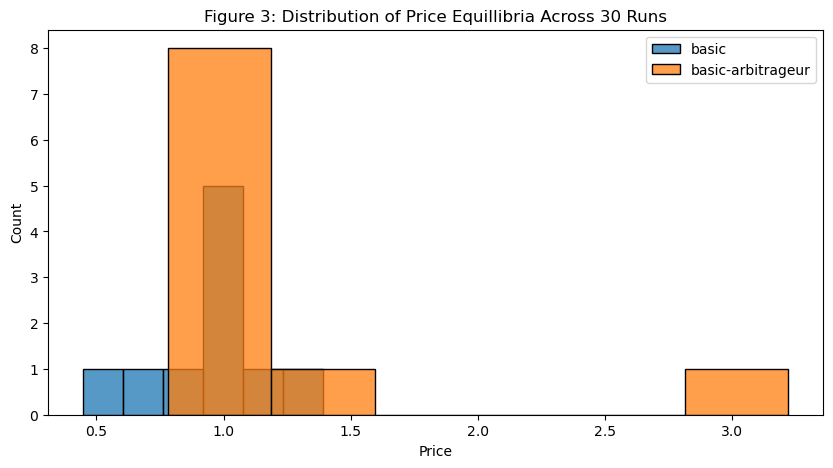

In [9]:
fig, ax = plt.subplots(figsize = (10, 5))
for i, breeds in enumerate(price_data.keys()): 
    sb.histplot(price_data[breeds], bins=6, color="C" + str(i), label=breeds, kde=False, ax=ax)
    
ax.legend()
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Figure 3: Distribution of Price Equillibria Across 30 Runs")


With current implementation, the spread in price equillibriums is significantly smaller with just optimizer agents.

In [10]:
data_by_breeds.keys()

dict_keys(['basic', 'basic-arbitrageur'])

Text(0.5, 1.0, 'Figure 2: Average Trading Price for All Goods, by Period, 30 Runs')

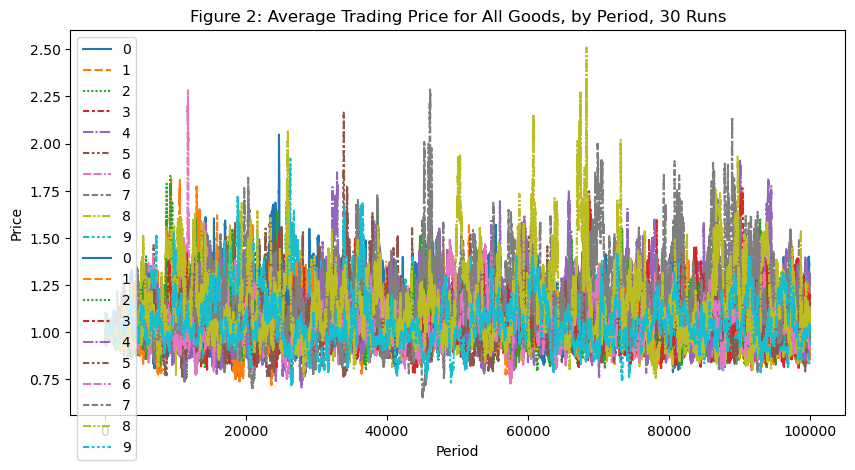

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))

#for i, breed in enumerate(data_by_breeds.keys()): 
    #sb.lineplot(data=data_by_breeds[breed]["total_avg_price"], alpha = 0.1, color="C"+str(i), palette=["C"+str(i)]*15, legend = False, lw=.5, ax=ax)
for i, breed in enumerate(data_by_breeds.keys()): 
    sb.lineplot(data=data_by_breeds[breed]["total_avg_price"].rolling(window=100).mean(), alpha=1, color="C" + str(i), label=None, ax=ax)
plt.xlabel("Period")
plt.ylabel("Price")
plt.title("Figure 2: Average Trading Price for All Goods, by Period, 30 Runs")

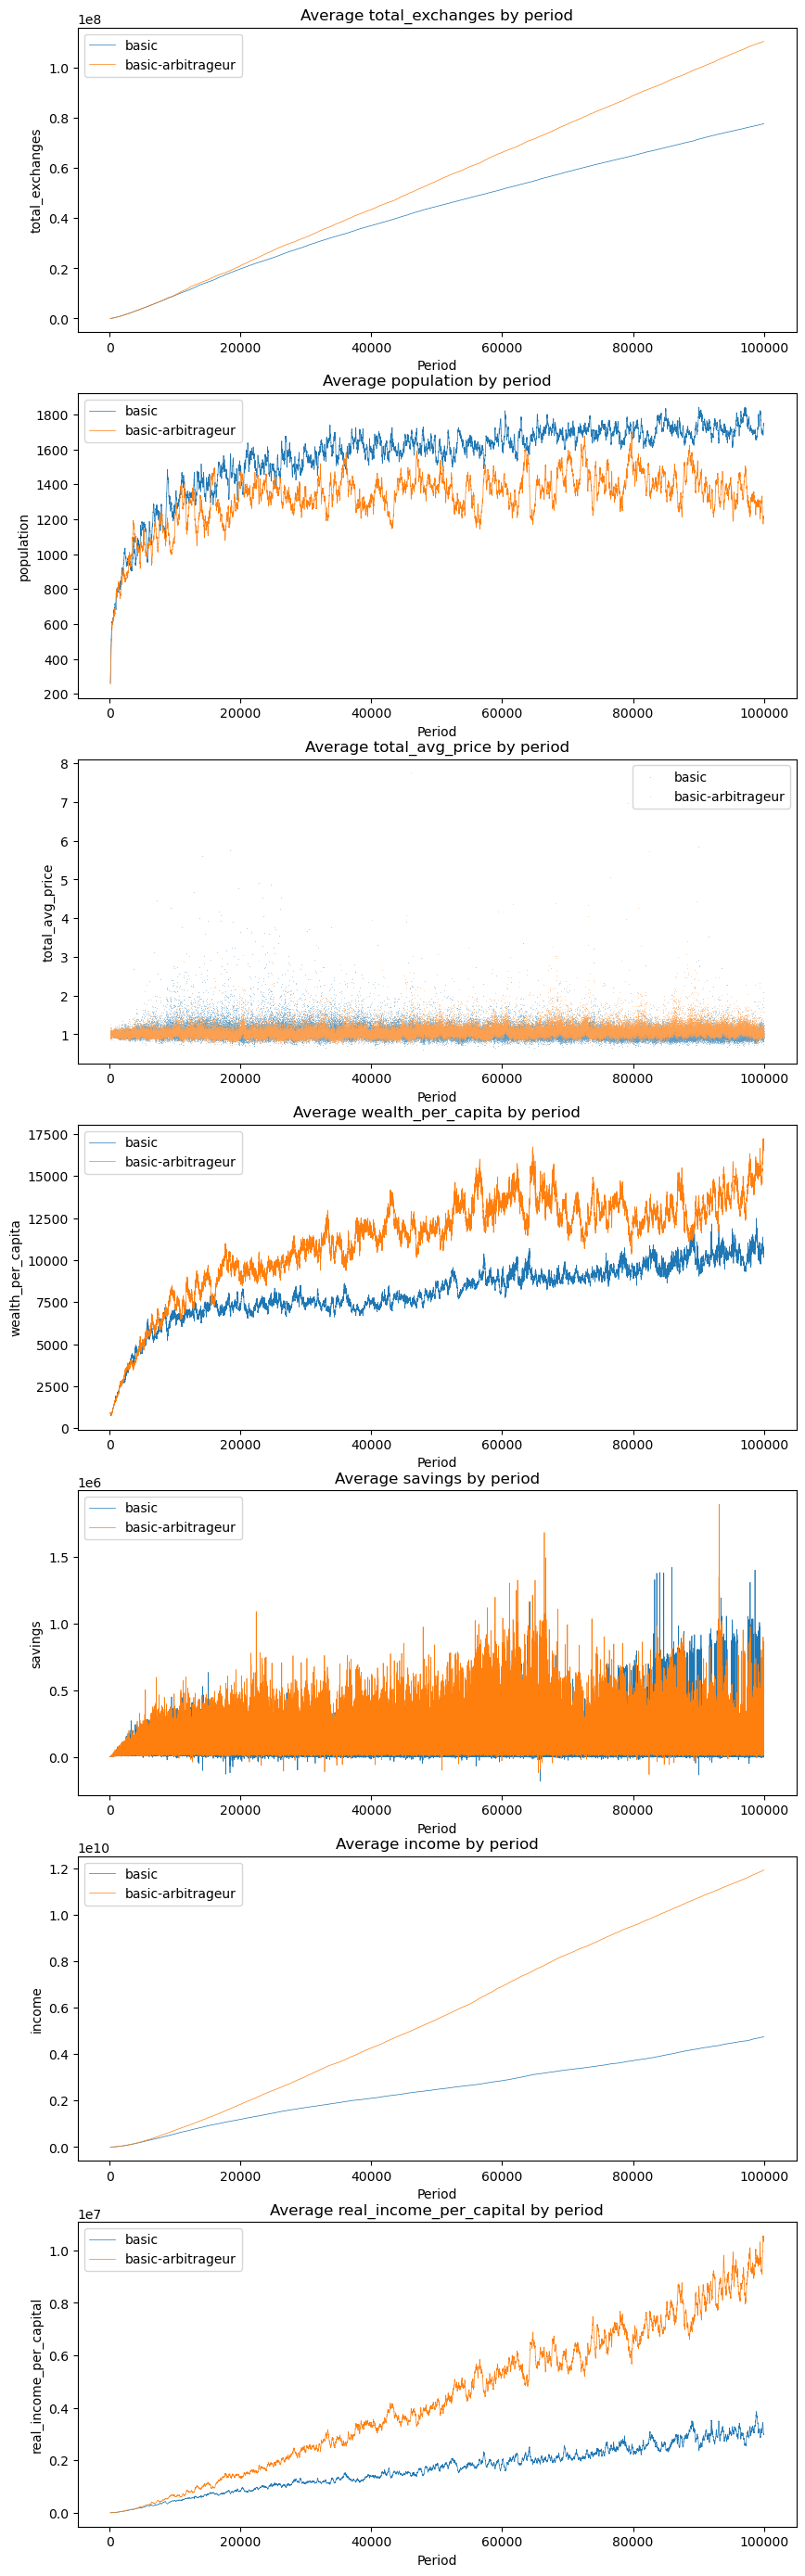

In [13]:
fig, axs = plt.subplots(len(cols), 1, figsize=(10, 5*len(cols)))

for j, attr in enumerate(cols): 
                       
   # for i, breed in enumerate(data_by_breeds.keys()): 
        #sb.lineplot(data=data_by_breeds[breed][attr][100:],
         #           alpha = 0.1,
         #           color="C"+str(i),
         #           palette=["C"+str(i)]*15,
         #           legend = False,
          #          lw=.5,
         #           ax=axs[j])
    for i, breed in enumerate(data_by_breeds.keys()): 
        if "price" in attr: 
            sb.scatterplot(data= data_by_breeds[breed][attr][100:].mean(axis=1), alpha = 1, color="C"+str(i), s=0.25, label=breed, ax=axs[j])
        else: 
            
            sb.lineplot(data=data_by_breeds[breed][attr][100:].mean(axis=1), alpha = 1, color="C"+str(i), lw=.5, label=breed, ax=axs[j])
        #sb.lineplot(data=data_by_breeds[breed]["water_avg_price"], alpha = 0.3, color="C"+str(i), legend = False, ax=ax)
        #sb.lineplot(data=data_by_breeds[breed]["water_avg_price"].mean(axis=1), alpha = 1, color="C"+str(i), label=None, ax=ax)
        #sb.lineplot(data=data_by_breeds[breed]["sugar_avg_price"], alpha = 0.3, color="C"+str(i), legend = False, ax=ax)
        #sb.lineplot(data=data_by_breeds[breed]["sugar_avg_price"].mean(axis=1), alpha = 1, color="C"+str(i), label=None, ax=ax)
    axs[j].set_xlabel("Period")
    axs[j].set_ylabel(attr)
    axs[j].set_title(f"Average {attr} by period")

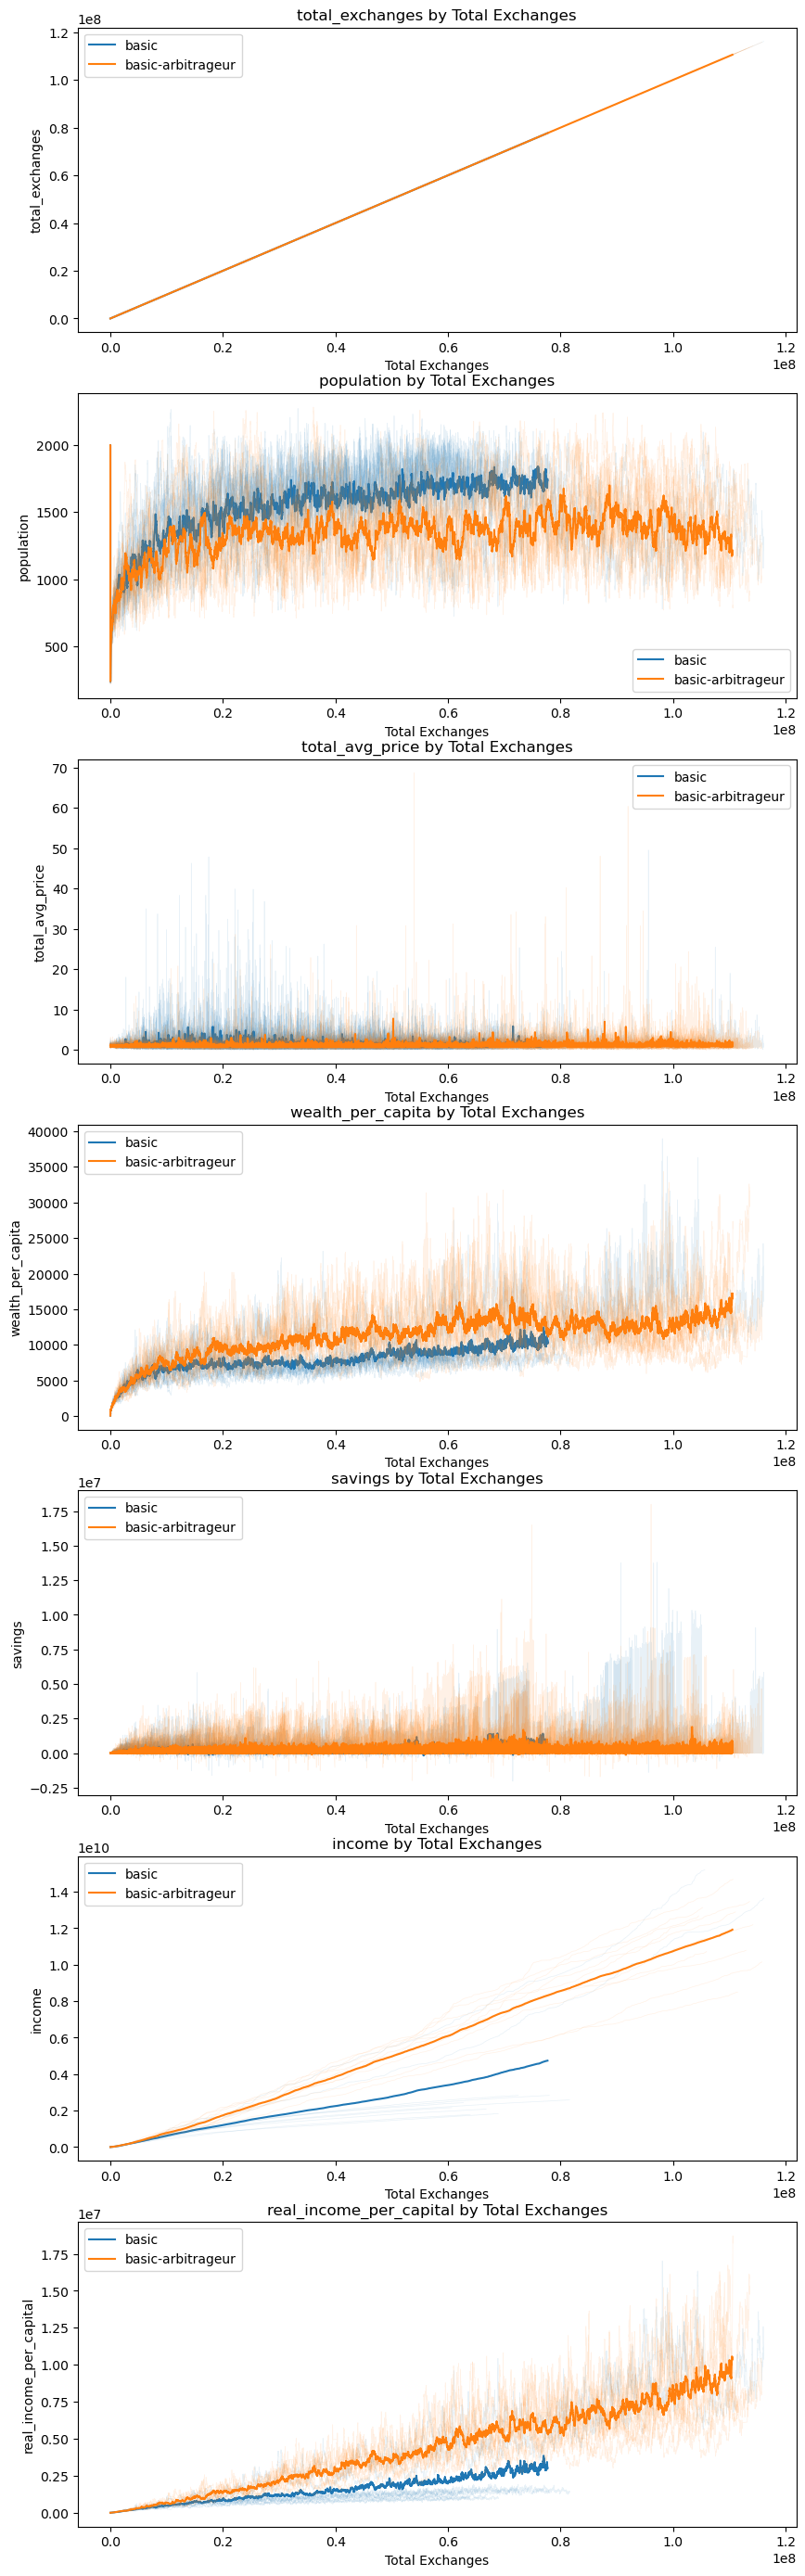

In [14]:
fig, axs = plt.subplots(len(cols), 1, figsize=(10,len(cols)*5))

for i, attr in enumerate(cols):
    for j, breed in enumerate(breed_sets): 
        te = pd.DataFrame.from_dict(data_by_breeds[breed]["total_exchanges"])
        attr_df = pd.DataFrame.from_dict(data_by_breeds[breed][attr])
    
        for run in range(runs): 
            sb.lineplot(x = te[run], y = attr_df[run], alpha=0.1,color = f"C{j}", palette = [f"C{j}"]*runs, lw=.5, ax=axs[i])
    
        sb.lineplot(x=te.mean(axis=1), y=attr_df.mean(axis=1), color = f"C{j}", label = breed, ax=axs[i])
    axs[i].set_xlabel("Total Exchanges")
    axs[i].set_ylabel(attr)
    axs[i].set_title(f"{attr} by Total Exchanges")